Decision Tree:

The first supervised machine learning algorithms that we'll be using is Decision Tree, it is a machine learning algorithm that can be used to create a model that predicts the value of a target variable based on the values of a set of input variables. However, Decision Tree is prone to overfitting, especially when the tree is deep and the data is noisy. Pruning, regularization, and ensemble methods can be used to prevent overfitting. 


In [19]:
# Import the necessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


# Load the dataset
path = "/Users/njodalghonaim/Desktop/Data/dataset.csv"
df = pd.read_csv(path)

# Declare the dependant variable and independent Variable

X = df.drop('price_range', axis=1)
y = df['price_range'].values.reshape(-1, 1)
print ('X:', X.shape,'\ny:', y.shape)
test_size = np.arange(start=0.2, stop=0.35, step= 0.05)

# Initialize a list where we'll store the score of each test size To find the best Test Size
score =[]
for size in test_size:
    X_train1, X_test1, y_train1, y_test1 = train_test_split (X, y, test_size=size, random_state=0)
    DT_Clf = DecisionTreeClassifier (max_depth=3)
    DT_Clf.fit (X_train1, y_train1)
    score.append (DT_Clf.score (X_test1, y_test1))

# Create a dataframe to display the results 
r= pd.DataFrame({'Test size': test_size , 'Score': score})
r.sort_values(by = ['Score'], ascending = False, inplace = True)
r.style.highlight_max(color='blue')



X: (2000, 20) 
y: (2000, 1)


,Test size,Score
1,0.250000,0.764000
0,0.200000,0.757500
2,0.300000,0.748333


From the aove result, We can see that the 0.25 test size had the highest score. therefore, We will be using it for Decision Tree modeling. We will then be splitting our train test dataset.

In [22]:
# Split X and y into training and testing sets (0.25 based on above result)
X_train, X_test, y_train, y_test = train_test_split (X, y, stratify=y, test_size = 0.25, random_state = 0)
# check the shape of X_train, X_test, y_train and y_test
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)


X_train shape:  (1500, 20)
X_test shape:  (500, 20)
y_train shape:  (1500, 1)
y_test shape:  (500, 1)


After that we will start with Building the Decision Tree Model.

In [29]:
# Instantiate the model
DT = DecisionTreeClassifier(max_depth=3)

# Fit the model to the training set
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

After that we will first predict the y (price_range) from the x in the test.

In [30]:
y_predict = DT.predict(X_test)

After that we will be checking the accuracy of the model:

In [31]:
from sklearn.metrics import accuracy_score


print('Decision Tree Model accuracy : {0:0.4f}'. format(accuracy_score(y_test, y_predict)))

Decision Tree Model accuracy : 0.7520


Since one of the major concerns with Decision Tress is the Overfitting and the underfitting, We will be checking for them:

In [32]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(DT.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(DT.score(X_test, y_test)))

Training set score: 0.7693
Test set score: 0.7520


Since the above results came up to be quite somewhat similiar it is safe to say that no overfitting happened. We will then be visualizing the model through Confusion Matrix and ROC Curve.

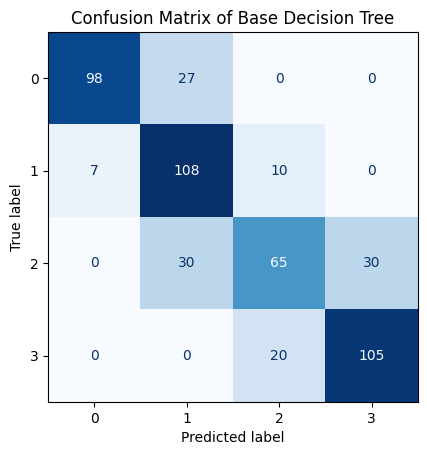

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(DT, X_test, y_test, colorbar=False, cmap='Blues')
plt.title('Confusion Matrix of Decision Tree Model')
plt.grid(False)

Before visualizing the ROC, we will dive into some classification reports and performance metricses:

In [35]:
from sklearn.metrics import classification_report

# print price_range classification and metrics reports
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       125
           1       0.65      0.86      0.74       125
           2       0.68      0.52      0.59       125
           3       0.78      0.84      0.81       125

    accuracy                           0.75       500
   macro avg       0.76      0.75      0.75       500
weighted avg       0.76      0.75      0.75       500



In [38]:
from sklearn.metrics import f1_score, precision_score, recall_score


def metrics_calculator(y_test, y_pred, model_name):
    '''
    This function calculates all desired performance metrics for a given model.
    '''
    result = pd.DataFrame(data=[accuracy_score(y_test, y_predict),
                                precision_score(y_test, y_predict, average='macro'),
                                recall_score(y_test, y_predict, average='macro'),
                                f1_score(y_test, y_predict, average='macro')],
                          index=['Accuracy','Precision','Recall','F1-score'],
                          columns = [model_name])
    return result
DT_result = metrics_calculator(y_test, y_predict, 'Decision Tree Model')
DT_result

,Decision Tree Model
Accuracy,0.752000
Precision,0.762467
Recall,0.752000
F1-score,0.748901


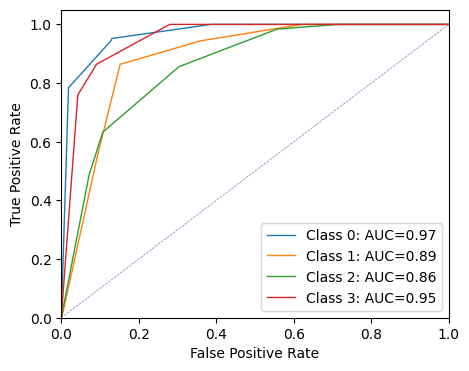

In [41]:
from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import label_binarize
y_Pred_prob = DT.predict_proba(X_test)

def roc_curve_plot(y_actual, y_predicted_probs, figsize=(5, 4), title=None, legend_loc='best'):

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    thres = {}
    roc_auc = {}

    n_class = y_predicted_probs.shape[1]
    for i in range(n_class):
        fpr[i], tpr[i], thres[i] = roc_curve(y_actual == i, y_predicted_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create a figure and plot the ROC curve for each class
    plt.figure(figsize=figsize)
    for i in range(n_class):
        plt.plot(fpr[i], tpr[i], linewidth=1, label='Class {}: AUC={:.2f}'.format(i, roc_auc[i]))
# Add diagonal line and axis labels
    plt.plot([0, 1], [0, 1], '--', linewidth=0.5)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # Set axis limits and add title and legend
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    if title is not None:
        plt.title(title)
    plt.legend(loc=legend_loc)

    # Show the plot
    plt.show()
        
roc_curve_plot(y_test, y_Pred_prob)

Finally and to better visualize we will be doing a Tree model:

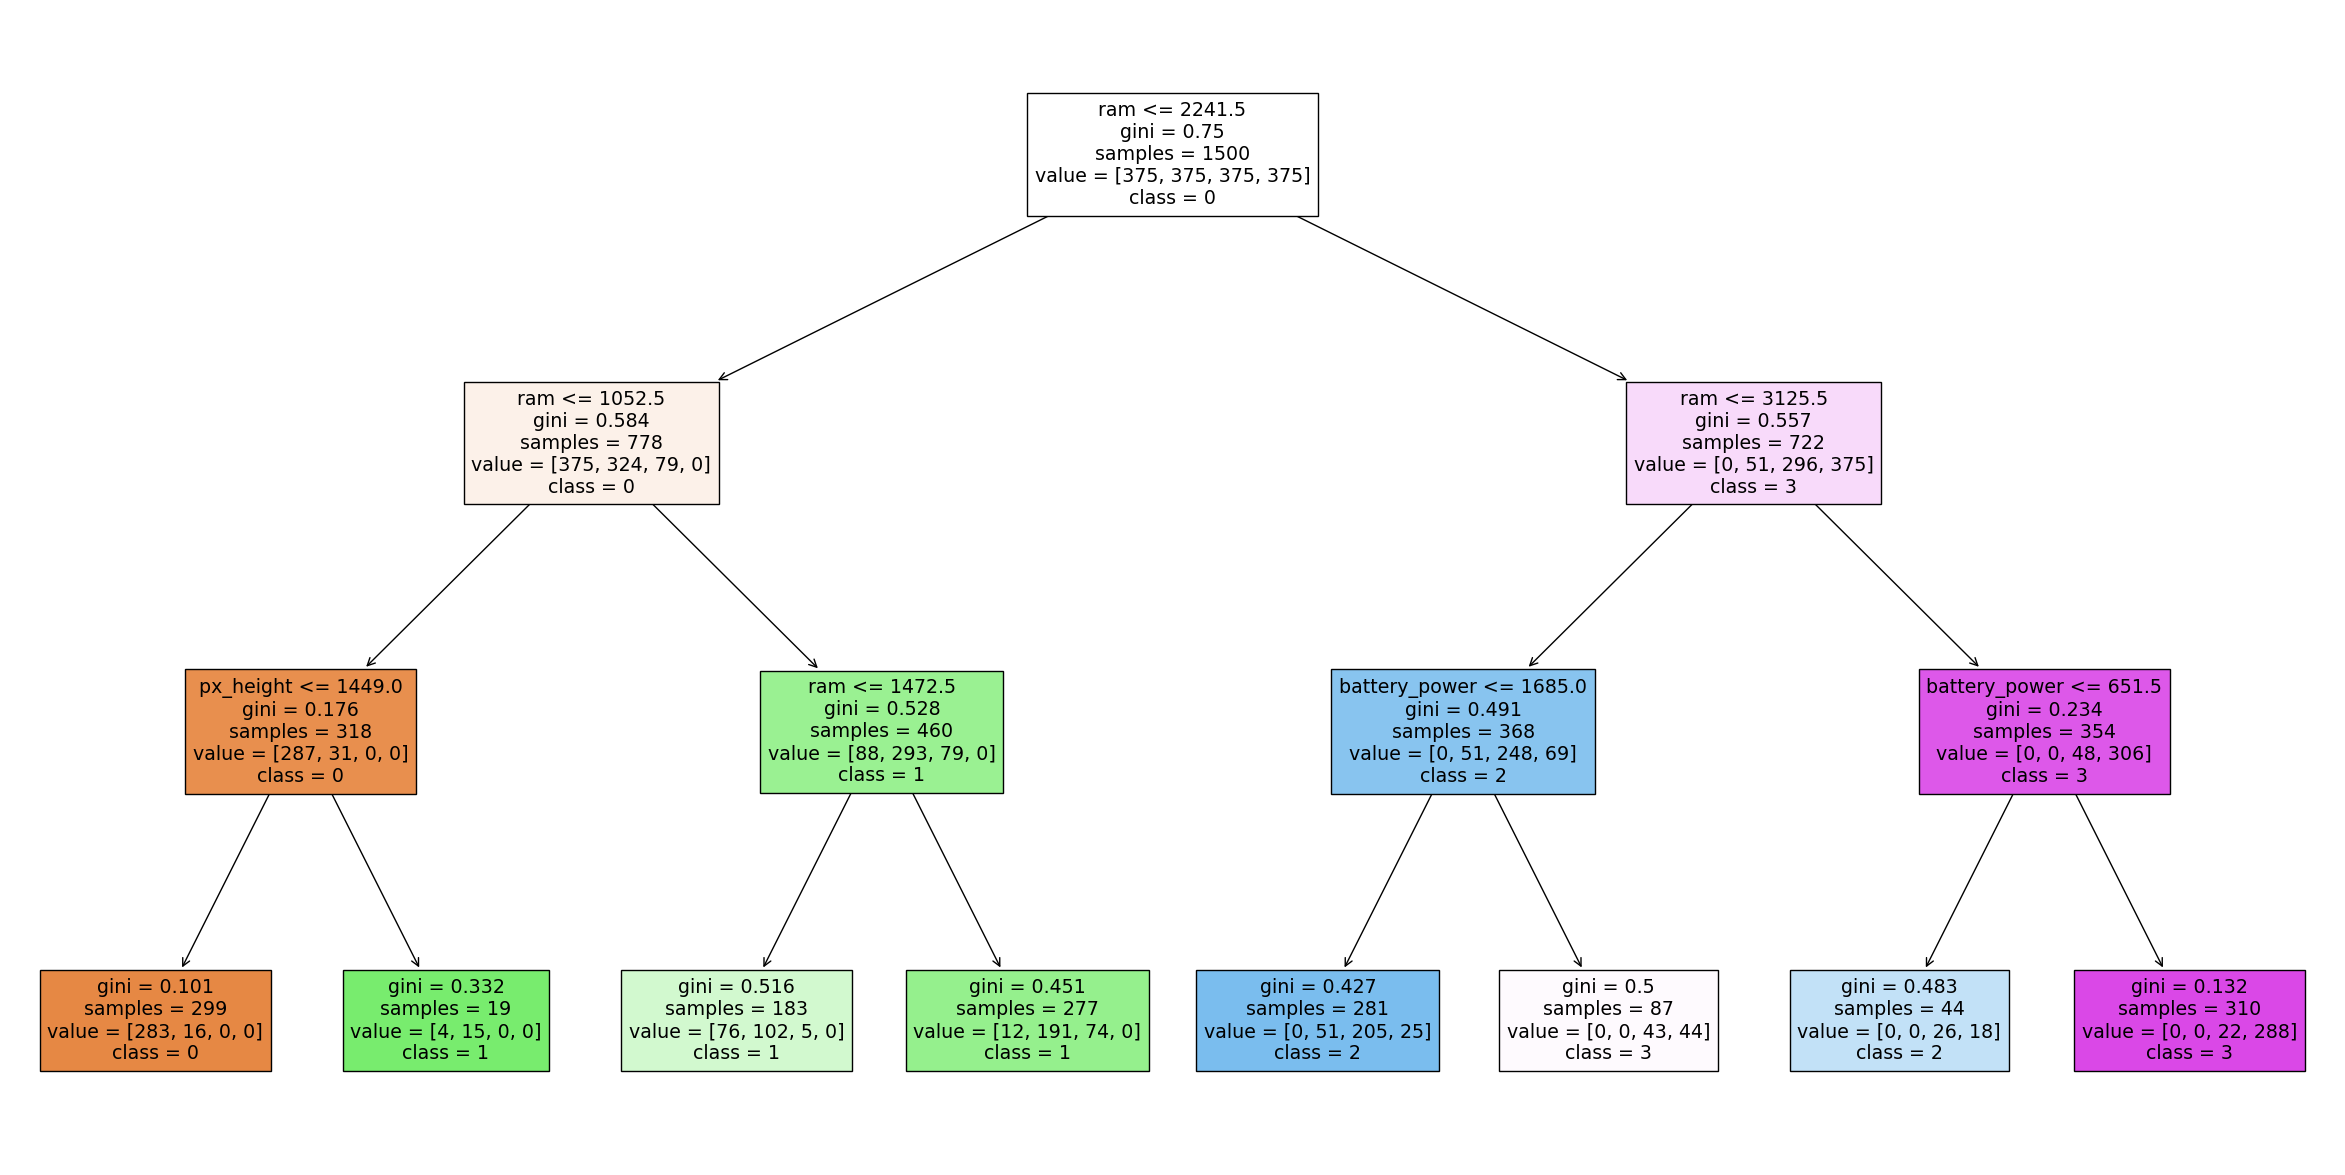

In [42]:
from sklearn import tree


feature_names = X.columns
target_names = ["0", "1", "2", "3"]

fig = plt.figure(figsize = (30, 15))
Plot = tree.plot_tree (DT, feature_names = feature_names, class_names = target_names, filled = True)

To show the importance of each feature we will construct a diagram:

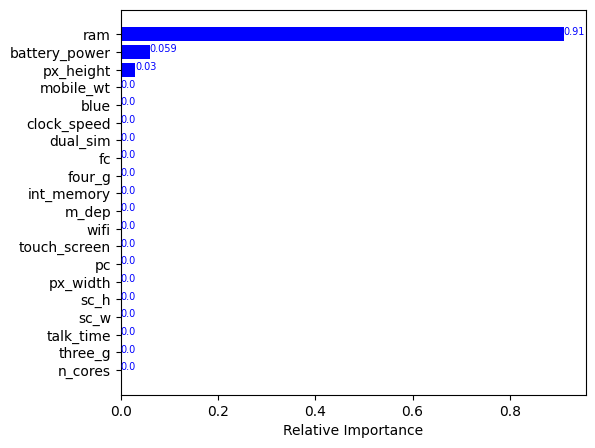

In [45]:
# Get feature importances from the Random Forest model
importances = DT.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)

# Create a horizontal bar plot of the feature importances
plt.figure(figsize=(6, 5))
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

# Add labels to the bars
for i, v in enumerate(importances[indices]):
    plt.text(v, i, str(round(v, 3)), color='blue', fontsize= 7)

plt.show()